# Bloom filter

> **Objective:** *"Estimate if a given element was seen before"*
> **Use cases:**
> 	- Check availability of a username
> 	- Check if an IP adress was seen before
> 	- Check if an element is in a cache (web, CDN)
> 	- Check if an element is in a list (spam, flagged, blocked)
> 	- Ignore duplicates

## Details

Bloom filter enables to make estimation about whether an element of interest was already observed in the stream.

* it considers `seen` as the `Positive` output, while `not yet seen` as the `Negative`.
* it can result in `False Positive` due to *hash collisions*, but never in `False Negative` prediction.

Maintains:

* a bit array with $m$ bits
* a number ($n$) of hash functions $h_1(), h_2(), \dots h_n()$,

based on a set of interacted elements $S$

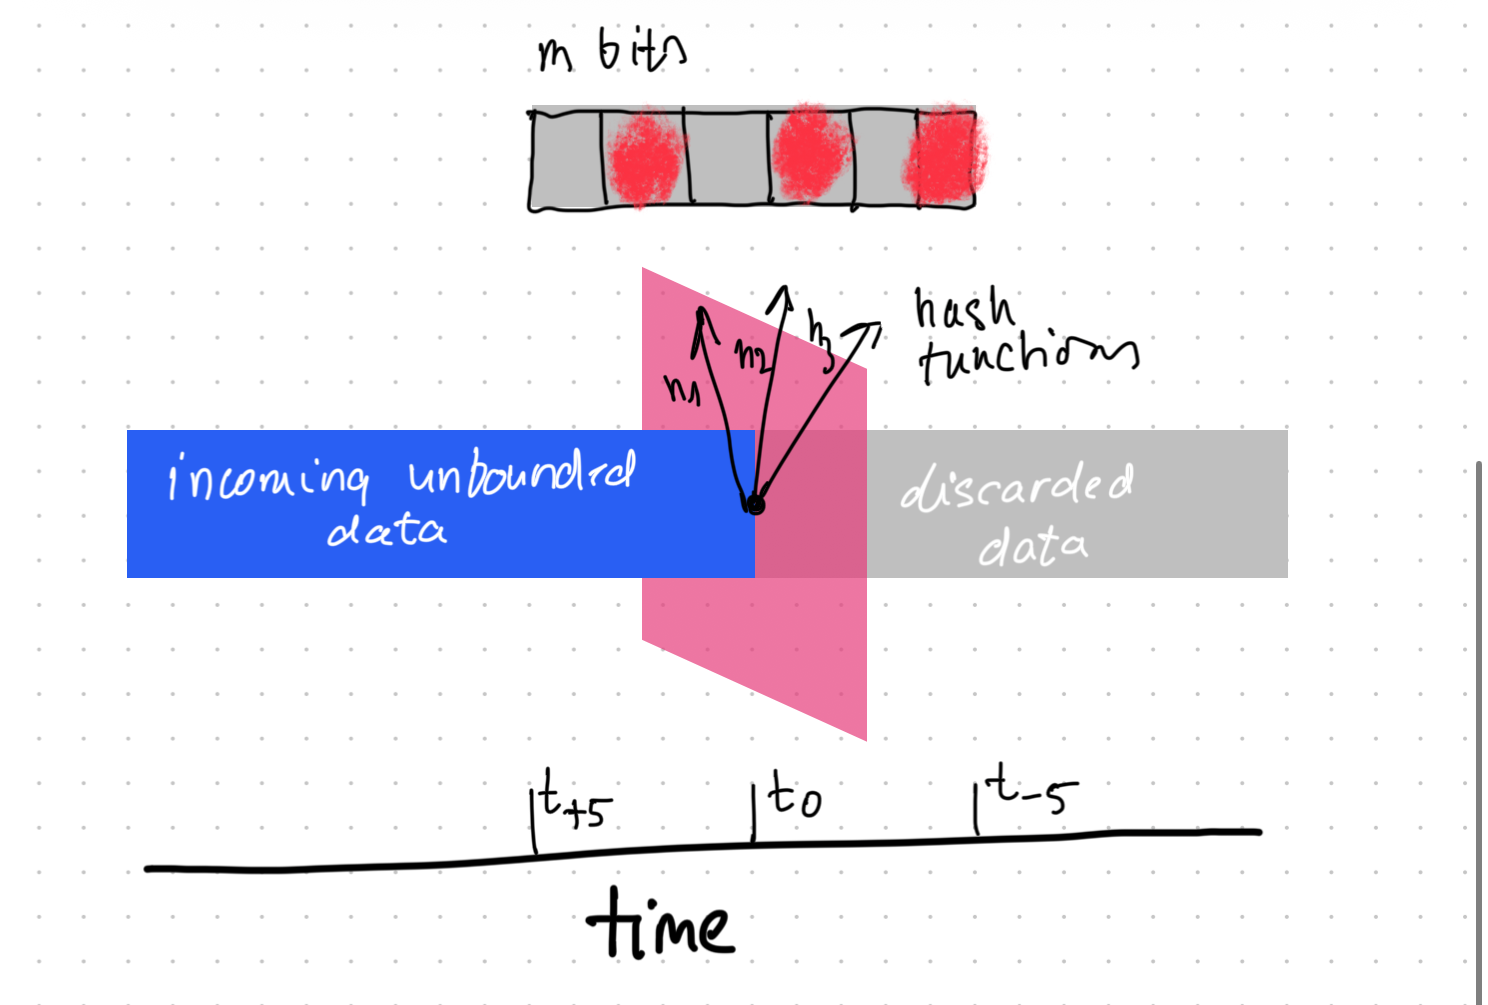{width=700}

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from river import sketch

RAND = 42
rng = random.Random(RAND)

def visualize_bitarray(filter, ax=None, return_fig=True, title=None):
	m = filter.n_bits
	bits = filter._bloom & ((1 << m) - 1)
	arr_labels = np.flip(np.arange(m))
	arr = np.array(list(format(bits, f'0{m}b')), dtype=int)

	if ax is None:
		ax = plt.gca()

	ax.axis('off')
	ax.axis('tight')

	table = ax.table(cellText=[arr], colLabels=arr_labels, loc='center')

	for i in range(m):
		table[(0, i)].set_facecolor('grey')
		table[(0, i)].get_text().set_color('darkgrey')

		if arr[i] == 1:
			table[(1, i)].set_facecolor('indianred')

	if title is not None:
		ax.set_title(title)

	if return_fig:
		return ax.figure
	else:
		plt.show()

Bloom filter created as:
Capacity: 4, FPR: 0.15, hash functions; 3, binary array size: 16

> Update phase 1:
>	 Introduce [1] to the Bloom filter...

> Query phase 1:
>	 Check prediction for [1]:  [True]
>	 Check prediction for [-1, 0, 1]:  [False, False, True]

> Update phase 2:
>	 Introduce [1, 2, 3, 4] to the Bloom filter...

> Query phase 2:
>	 Check prediction for [1, 2, 3, 4]:  [True, True, True, True]
>	 Check prediction for [-1, 0, 1]:  [True, False, True]

>> 'First collision was with element of (-1), leading to a False Positive prediction'

> Update phase 3:
>	 Introduce [5] to the Bloom filter...

> Query phase 3:
>	 Check prediction for [5]:  [True]
>	 Check prediction for [-1, 0, 1]:  [True, False, True]


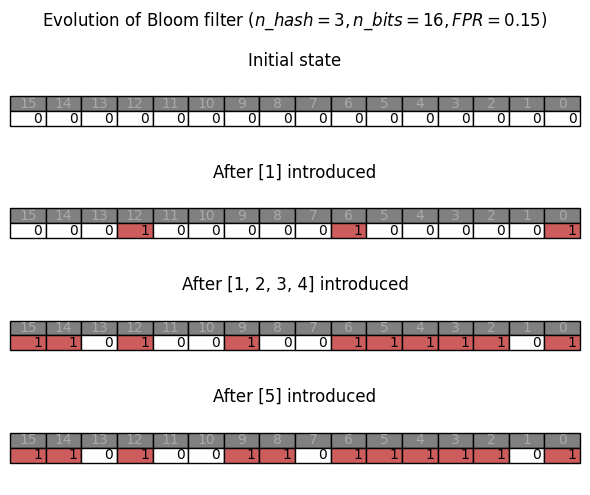

In [2]:
fig, axes = plt.subplots(4, 1, figsize=(6, 5))
axes = axes.flatten()

# create filter
bloomfilter = sketch.Set(capacity=4, fp_rate=.15, seed=RAND)
print("Bloom filter created as:")
print(f"Capacity: {bloomfilter.capacity}, FPR: {bloomfilter.fp_rate}, hash functions; {bloomfilter.n_hash}, binary array size: {bloomfilter.n_bits}")

ax = axes[0]
visualize_bitarray(bloomfilter, title="Initial state", ax=ax)

# introduce elements
S = [1]
print("\n> Update phase 1:")
print(f">\t Introduce {S} to the Bloom filter...")
for x in S:
    bloomfilter.add(x)

ax = axes[1]
visualize_bitarray(bloomfilter, title=f"After {S} introduced", ax=ax)

# check predictions
print("\n> Query phase 1:")
print(f">\t Check prediction for {S}: ", [s in bloomfilter for s in S])
print(f">\t Check prediction for {[-1, 0, 1]}: ", [x in bloomfilter for x in [-1, 0, 1]])

# introduce elements
S = [1, 2, 3, 4]
print("\n> Update phase 2:")
print(f">\t Introduce {S} to the Bloom filter...")
for x in S:
    bloomfilter.add(x)
    
ax = axes[2]
visualize_bitarray(bloomfilter, title=f"After {S} introduced", ax=ax)

# check predictions
print("\n> Query phase 2:")
print(f">\t Check prediction for {S}: ", [s in bloomfilter for s in S])
print(f">\t Check prediction for {[-1, 0, 1]}: ", [x in bloomfilter for x in [-1, 0, 1]])

print("\n>> 'First collision was with element of (-1), leading to a False Positive prediction'")

# introduce elements
S = [5]
print("\n> Update phase 3:")
print(f">\t Introduce {S} to the Bloom filter...")
for x in S:
    bloomfilter.add(x)

ax = axes[3]
visualize_bitarray(bloomfilter, title=f"After {S} introduced", ax=ax)

# check predictions
print("\n> Query phase 3:")
print(f">\t Check prediction for {S}: ", [s in bloomfilter for s in S])
print(f">\t Check prediction for {[-1, 0, 1]}: ", [x in bloomfilter for x in [-1, 0, 1]])

plt.suptitle(f"Evolution of Bloom filter ($n\_hash={bloomfilter.n_hash}, n\_bits={bloomfilter.n_bits}, FPR={bloomfilter.fp_rate}$)")
plt.tight_layout()
plt.show()